<a href="https://colab.research.google.com/github/Rakeshkomminen/FIFA-DataSet-Analysis-Web-Scraping..../blob/main/FIFA_DataSet_Analysis(Web_Scraping)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [180]:
# NumPy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# BeautifulSoup
from bs4 import BeautifulSoup

# Request
import requests

# RegEX
import re

Web Scraping

In [181]:
url = 'https://sofifa.com/players?offset=1'
req = requests.get(url)
req



<Response [200]>

In [182]:
soup = BeautifulSoup(req.content)
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <title>\n   Players FIFA 21 Sep 17, 2021 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 21 player ratings on Sep 17, 2021" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2021 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <link href="https://cdn.sofifa.com" rel="preconnect"/>\n  <link href="https://cdn.sofifa.com" rel="dns-prefetch"/>\n  <link href="https://pagead2.googlesyndication.com" rel="preconnect"/>\n  <link href="https://pagead2.googlesyndication.com" rel="dns-prefetch"/>\n  <script async="" crossorigin="anonymous" src="https://pagead2.googl

Data Exploration,Data Cleaning,Data Manipulation

In [183]:
columns = ['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 
           'Duration', 'Value', 'Wage', 'Total_stats', ]

In [184]:
def  fifa_datset(url):
  fifa_final = pd.DataFrame()

  for i in range(1,11):
    # url = f'https://sofifa.com/players?offset={i}'
    url = url+str(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(11)]

    for i in soup.findAll('tr'):
      Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
      Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
      Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
      OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
      POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
      Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
      Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
      Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
      Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
      Hits = re.sub('<td.*">\n|K</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

      lists[0].append(Image_link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)
      

    fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                      'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                      'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                      'Total_stats':lists[9],})
    
    fifa.drop(0, inplace=True)
    
    fifa['Age'] = pd.to_numeric(fifa['Age'])
    fifa['OVA'] = pd.to_numeric(fifa['OVA'])
    fifa['POT'] = pd.to_numeric(fifa['POT'])
    fifa['Value'] = pd.to_numeric(fifa['Value'])
    fifa['Wage'] = pd.to_numeric(fifa['Wage'])
    fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
    

    fifa_final = fifa_final.append(fifa, ignore_index = True)
  
  return fifa_final

  



In [185]:
fifa['Value']

1      37.5
2        11
3      29.5
4      26.5
5        29
6        17
7      24.5
8        63
9     122.5
10     27.5
11       24
12      700
13      6.5
14      1.1
15     94.5
16        9
17      9.5
18      3.7
19    118.5
20       34
21       17
22       78
23        0
24      110
25        7
26     38.5
27       21
28     49.5
29      1.6
30       17
31     79.5
32       54
33     80.5
34      3.2
35    185.5
36       10
37       27
38    124.5
39       37
40      9.5
41     29.5
42      5.5
43     31.5
44      1.8
45       53
46        8
47        2
48       13
49     92.5
50     45.5
51     23.5
52      4.7
53      8.5
54      2.8
55       22
56       56
57    114.5
58       10
59       10
60     13.5
Name: Value, dtype: object

In [186]:
fifa['Wage']

1      70
2      40
3      33
4      19
5       6
6       6
7       6
8     220
9      72
10     41
11     15
12    650
13    500
14      2
15    130
16     14
17      7
18      7
19     82
20     35
21     24
22    125
23      0
24    210
25      6
26     17
27      4
28     82
29      6
30      7
31    115
32     41
33     61
34      1
35    160
36      6
37     17
38    270
39     29
40    500
41     35
42     11
43     21
44      7
45     40
46     89
47      9
48     50
49    135
50     95
51     14
52      7
53     77
54      3
55     51
56     90
57    230
58      9
59     16
60     59
Name: Wage, dtype: object

In [187]:
fifa.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.com/players/229/906/21_120.png,Leon Bailey,22,81,85,Bayer 04 Leverkusen,2017 ~ 2023,37.5,70,2004
2,https://cdn.sofifa.com/players/212/228/21_120.png,Ivan Toney,24,76,80,Brentford,2020 ~ 2025,11,40,1948
3,https://cdn.sofifa.com/players/237/678/21_120.png,Ibrahima Konaté,21,78,87,RB Leipzig,2017 ~ 2023,29.5,33,1725
4,https://cdn.sofifa.com/players/233/096/21_120.png,Denzel Dumfries,24,80,83,PSV,2018 ~ 2023,26.5,19,2006
5,https://cdn.sofifa.com/players/248/243/21_120.png,Eduardo Camavinga,17,78,89,Stade Rennais FC,2019 ~ 2022,29,6,2086


In [188]:
fifa.tail()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
56,https://cdn.sofifa.com/players/235/212/21_120.png,Achraf Hakimi,21,83,88,Inter,2020 ~ 2025,56,90,2150
57,https://cdn.sofifa.com/players/202/126/21_120.png,Harry Kane,26,89,89,Tottenham Hotspur,2010 ~ 2024,114.5,230,2208
58,https://cdn.sofifa.com/players/245/371/21_120.png,Thiago Almada,19,74,86,Vélez Sarsfield,2018 ~ 2023,10,9,1985
59,https://cdn.sofifa.com/players/246/420/21_120.png,Jérémy Doku,18,74,86,Stade Rennais FC,2020 ~ 2025,10,16,1750
60,https://cdn.sofifa.com/players/237/681/21_120.png,Takefusa Kubo,19,75,88,Getafe CF,"Jun 30, 2021",13.5,59,1827


In [189]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   60 non-null     object
 1   Name         60 non-null     object
 2   Age          60 non-null     int64 
 3   OVA          60 non-null     int64 
 4   POT          60 non-null     int64 
 5   Team         60 non-null     object
 6   Duration     60 non-null     object
 7   Value        60 non-null     object
 8   Wage         60 non-null     object
 9   Total_stats  60 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 5.2+ KB


In [190]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   60 non-null     object
 1   Name         60 non-null     object
 2   Age          60 non-null     int64 
 3   OVA          60 non-null     int64 
 4   POT          60 non-null     int64 
 5   Team         60 non-null     object
 6   Duration     60 non-null     object
 7   Value        60 non-null     object
 8   Wage         60 non-null     object
 9   Total_stats  60 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 5.2+ KB


In [191]:
fifa

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.com/players/229/906/21_120.png,Leon Bailey,22,81,85,Bayer 04 Leverkusen,2017 ~ 2023,37.5,70,2004
2,https://cdn.sofifa.com/players/212/228/21_120.png,Ivan Toney,24,76,80,Brentford,2020 ~ 2025,11,40,1948
3,https://cdn.sofifa.com/players/237/678/21_120.png,Ibrahima Konaté,21,78,87,RB Leipzig,2017 ~ 2023,29.5,33,1725
4,https://cdn.sofifa.com/players/233/096/21_120.png,Denzel Dumfries,24,80,83,PSV,2018 ~ 2023,26.5,19,2006
5,https://cdn.sofifa.com/players/248/243/21_120.png,Eduardo Camavinga,17,78,89,Stade Rennais FC,2019 ~ 2022,29,6,2086
6,https://cdn.sofifa.com/players/252/371/21_120.png,Jude Bellingham,17,76,88,Borussia Dortmund,2020 ~ 2025,17,6,2015
7,https://cdn.sofifa.com/players/246/104/21_120.png,Ryan Gravenberch,18,77,89,Ajax,2018 ~ 2023,24.5,6,2033
8,https://cdn.sofifa.com/players/020/801/21_120.png,C. Ronaldo dos Santos Aveiro,35,92,92,Juventus,2018 ~ 2022,63,220,2221
9,https://cdn.sofifa.com/players/239/085/21_120.png,Erling Haaland,19,87,93,Borussia Dortmund,2020 ~ 2024,122.5,72,2086
10,https://cdn.sofifa.com/players/216/388/21_120.png,Allan Saint-Maximin,23,79,85,Newcastle United,2019 ~ 2026,27.5,41,1856


In [192]:
fifa_final = pd.DataFrame()

for i in range(1,11):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  soup = BeautifulSoup(req.content)
  lists = [[] for _ in range(11)]

  for i in soup.findAll('tr'):
    Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
    Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
    OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
    POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
    Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
    Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
    Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
    

    lists[0].append(Image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)
    

  fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                    'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                    'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                    'Total_stats':lists[9],})
  
  fifa.drop(0, inplace=True)
  
  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
  

  fifa_final = fifa_final.append(fifa, ignore_index = True)

In [193]:
fifa_600 = fifa_final
fifa_598 = fifa_datset("https://sofifa.com/players?offset=")

In [194]:
print(fifa_600.shape)
fifa_598.shape

(600, 10)


(600, 10)

In [195]:
print(fifa_600.columns)
fifa_598.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')


Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [196]:
fifa_598.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [197]:
fifa_600.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [198]:
pd.concat([fifa_600,fifa_598]).drop_duplicates(keep=False)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
118,https://cdn.sofifa.com/players/234/378/21_120.png,Declan Rice,21,81,86,West Ham United,2016 ~ 2024,36.5,35,1932
119,https://cdn.sofifa.com/players/237/681/21_120.png,Takefusa Kubo,19,75,88,Getafe CF,"Jun 30, 2021",13.5,59,1827
120,https://cdn.sofifa.com/players/238/074/21_120.png,Reece James,20,80,86,Chelsea,2017 ~ 2025,30.5,61,2076
121,https://cdn.sofifa.com/players/192/505/21_120.png,Romelu Lukaku,27,86,86,Inter,2019 ~ 2024,73.5,175,2032
122,https://cdn.sofifa.com/players/212/198/21_120.png,Bruno Miguel Borges Fernandes,25,88,91,Manchester United,2020 ~ 2025,121.0,240,2347
...,...,...,...,...,...,...,...,...,...,...
295,https://cdn.sofifa.com/players/188/305/21_120.png,Aziz Bouhaddouz,33,66,66,MSV Duisburg,2021 ~ 2023,550.0,1,1645
296,https://cdn.sofifa.com/players/188/403/17_120.png,Oupa Manyisa,27,76,76,Orlando Pirates,2007 ~ 2018,5.0,2,2001
297,https://cdn.sofifa.com/players/188/414/21_120.png,Carlos Villanueva,34,73,73,CD Palestino,2020 ~ 2021,1.4,5,1870
298,https://cdn.sofifa.com/players/188/424/21_120.png,Dries Wuytens,29,67,67,Waasland-Beveren,2020 ~ 2023,850.0,4,1497


In [199]:
fifa_600.iloc[-1]

Image_link     https://cdn.sofifa.com/players/228/702/21_120.png
Name                                             Frenkie de Jong
Age                                                           23
OVA                                                           86
POT                                                           91
Team                                                FC Barcelona
Duration                                             2019 ~ 2026
Value                                                        102
Wage                                                         210
Total_stats                                                 2203
Name: 599, dtype: object

In [200]:
fifa_598.iloc[-1]

Image_link     https://cdn.sofifa.com/players/242/412/21_120.png
Name                                             Marko Mihojević
Age                                                           24
OVA                                                           69
POT                                                           75
Team                                                  Göztepe SK
Duration                                             2020 ~ 2023
Value                                                          2
Wage                                                           9
Total_stats                                                 1548
Name: 599, dtype: object

In [201]:
fifa_600['Age'].equals(fifa_598['Age'])

False

In [202]:
fifa_600

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.com/players/029/552/21_120.png,Shunsuke Nakamura,42,64,64,Yokohama FC,2019 ~ 2022,0.0,900,1656
1,https://cdn.sofifa.com/players/227/174/21_120.png,Matty Cash,22,77,83,Aston Villa,2020 ~ 2025,16.0,43,1971
2,https://cdn.sofifa.com/players/231/936/21_120.png,Ben White,22,76,87,Brighton & Hove Albion,2015 ~ 2024,15.5,40,1661
3,https://cdn.sofifa.com/players/202/166/21_120.png,Julian Draxler,26,80,81,Paris Saint-Germain,2017 ~ 2024,25.0,83,2067
4,https://cdn.sofifa.com/players/233/934/21_120.png,Aaron Ramsdale,22,74,79,Sheffield United,2020 ~ 2024,5.0,18,1249
...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.com/players/235/212/21_120.png,Achraf Hakimi,21,83,88,Inter,2020 ~ 2025,56.0,90,2150
596,https://cdn.sofifa.com/players/246/420/21_120.png,Jérémy Doku,18,74,86,Stade Rennais FC,2020 ~ 2025,10.0,16,1750
597,https://cdn.sofifa.com/players/245/371/21_120.png,Thiago Almada,19,74,86,Vélez Sarsfield,2018 ~ 2023,10.0,9,1985
598,https://cdn.sofifa.com/players/202/126/21_120.png,Harry Kane,26,89,89,Tottenham Hotspur,2010 ~ 2024,114.5,230,2208


In [203]:
fifa_600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          600 non-null    int64  
 4   POT          600 non-null    int64  
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    float64
 8   Wage         600 non-null    int64  
 9   Total_stats  600 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 47.0+ KB


In [204]:
# Removing Columns - Image_link & Duration
fifa_600.drop(['Image_link','Duration'],inplace = True,axis=1)

In [205]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Shunsuke Nakamura,42,64,64,Yokohama FC,0.0,900,1656
1,Matty Cash,22,77,83,Aston Villa,16.0,43,1971
2,Ben White,22,76,87,Brighton & Hove Albion,15.5,40,1661
3,Julian Draxler,26,80,81,Paris Saint-Germain,25.0,83,2067
4,Aaron Ramsdale,22,74,79,Sheffield United,5.0,18,1249
...,...,...,...,...,...,...,...,...
595,Achraf Hakimi,21,83,88,Inter,56.0,90,2150
596,Jérémy Doku,18,74,86,Stade Rennais FC,10.0,16,1750
597,Thiago Almada,19,74,86,Vélez Sarsfield,10.0,9,1985
598,Harry Kane,26,89,89,Tottenham Hotspur,114.5,230,2208


In [206]:
fifa_600.head(15)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Shunsuke Nakamura,42,64,64,Yokohama FC,0.0,900,1656
1,Matty Cash,22,77,83,Aston Villa,16.0,43,1971
2,Ben White,22,76,87,Brighton & Hove Albion,15.5,40,1661
3,Julian Draxler,26,80,81,Paris Saint-Germain,25.0,83,2067
4,Aaron Ramsdale,22,74,79,Sheffield United,5.0,18,1249
5,Maxence Lacroix,20,77,84,VfL Wolfsburg,19.5,28,1699
6,Martin Ødegaard,21,83,89,Arsenal,58.5,135,2095
7,Noa Lang,21,77,85,Club Brugge KV,23.5,14,1980
8,Lionel Messi,33,93,93,Paris Saint-Germain,103.5,320,2231
9,Leon Bailey,22,81,85,Bayer 04 Leverkusen,37.5,70,2004


In [207]:
fifa_600.tail(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
590,Rayan Cherki,16,71,88,Olympique Lyonnais,4.7,7,1684
591,Mohamed Daramy,18,68,82,FC København,2.8,3,1642
592,Marcos Aoás Corrêa,26,87,90,Paris Saint-Germain,92.5,135,2031
593,Radamel Falcao García Zarate,34,79,79,Galatasaray SK,8.5,77,1941
594,Yves Bissouma,23,78,84,Brighton & Hove Albion,22.0,51,2086
595,Achraf Hakimi,21,83,88,Inter,56.0,90,2150
596,Jérémy Doku,18,74,86,Stade Rennais FC,10.0,16,1750
597,Thiago Almada,19,74,86,Vélez Sarsfield,10.0,9,1985
598,Harry Kane,26,89,89,Tottenham Hotspur,114.5,230,2208
599,Frenkie de Jong,23,86,91,FC Barcelona,102.0,210,2203


In [208]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,21.471667,77.896667,86.300000,48.430333,81.560000,1902.958333
std,4.602663,6.908850,5.118626,93.445413,132.448609,242.773725
min,16.000000,61.000000,64.000000,0.000000,0.000000,1039.000000
25%,18.000000,74.000000,85.000000,9.000000,7.000000,1815.000000
50%,20.000000,78.000000,87.000000,24.500000,33.000000,1948.000000
75%,24.000000,81.000000,89.000000,54.000000,89.000000,2047.000000
max,42.000000,93.000000,95.000000,700.000000,900.000000,2312.000000


1.Find the name of the player who is having the highest wage.

In [209]:
fifa_600[fifa_600['Wage']==max(fifa_600['Wage'])]['Name']

0    Shunsuke Nakamura
Name: Name, dtype: object

2.Duplicate Datas

In [210]:
fifa_600.duplicated().sum(axis=0)

531

In [211]:
fifa_600.drop_duplicates(inplace=True)

In [212]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,21.884058,77.927536,85.942029,46.984058,92.985507,1905.072464
std,5.068752,6.960643,5.583284,88.953041,158.021824,246.385537
min,16.000000,61.000000,64.000000,0.000000,0.000000,1039.000000
25%,18.000000,74.000000,85.000000,9.500000,9.000000,1800.000000
50%,21.000000,78.000000,87.000000,24.000000,35.000000,1964.000000
75%,24.000000,81.000000,89.000000,54.000000,90.000000,2057.000000
max,42.000000,93.000000,95.000000,700.000000,900.000000,2312.000000


2.1 Find the youngest player

2.2 Find the oldest player

In [213]:
print(fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Age'])

print(fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Age'])

59    Rayan Cherki
Name: Name, dtype: object 59    16
Name: Age, dtype: int64
0    Shunsuke Nakamura
Name: Name, dtype: object 0    42
Name: Age, dtype: int64


3.List out the Top 10 players according to their POT

In [214]:
fifa_600.sort_values(by='POT', ascending=False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
40,Kylian Mbappé,21,90,95,Paris Saint-Germain,185.5,160,2157
17,Erling Haaland,19,87,93,Borussia Dortmund,122.5,72,2086
41,João Félix Sequeira,20,83,93,Atlético Madrid,80.5,61,2072
8,Lionel Messi,33,93,93,Paris Saint-Germain,103.5,320,2231
51,Robert Lewandowski,31,92,92,FC Bayern München,124.5,270,2211
39,Phil Foden,20,83,92,Manchester City,79.5,115,2035
28,Jadon Sancho,20,87,92,Borussia Dortmund,118.5,82,2011
16,C. Ronaldo dos Santos Aveiro,35,92,92,Juventus,63.0,220,2221
30,Matvey Safonov,21,72,91,Russia,0.0,0,1039
19,Pedro González López,17,77,91,FC Barcelona,24.0,15,1947


In [215]:
fifa_600.sort_values(by='POT',ascending=False)['Name'].head(10)

40                   Kylian Mbappé
17                  Erling Haaland
41             João Félix Sequeira
8                     Lionel Messi
51              Robert Lewandowski
39                      Phil Foden
28                    Jadon Sancho
16    C. Ronaldo dos Santos Aveiro
30                  Matvey Safonov
19            Pedro González López
Name: Name, dtype: object

4.Create a new DataFrame with the values of columns - Name & POT

In [216]:
new_fifa = fifa_600[['Name','POT']]

In [217]:
new_fifa.head(10)

,Name,POT
0,Shunsuke Nakamura,64
1,Matty Cash,83
2,Ben White,87
3,Julian Draxler,81
4,Aaron Ramsdale,79
5,Maxence Lacroix,84
6,Martin Ødegaard,89
7,Noa Lang,85
8,Lionel Messi,93
9,Leon Bailey,85



5.Plot a graph - Player's Name V/s Player's POT

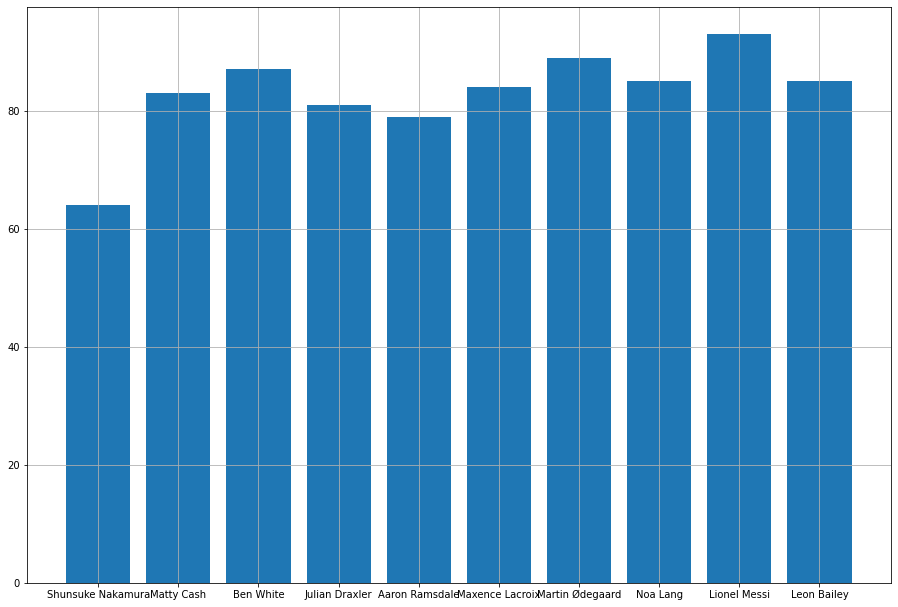

In [218]:
fig = plt.figure()
plt = fig.add_axes([1,1,2,2])

x = new_fifa['Name'].head(10)
y = new_fifa['POT'].head(10)
plt.bar(x,y)
plt.grid()

6.Plot a graph - Player's Name V/s Player's Wage

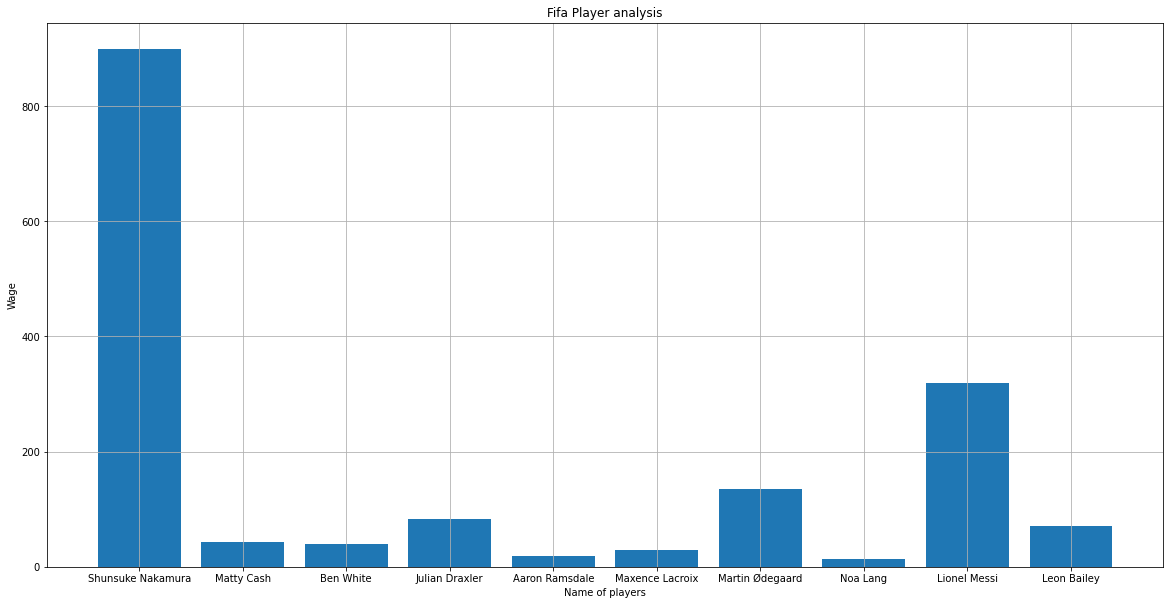

In [219]:
import matplotlib.pyplot as plt


xpoints = fifa_600['Name'][:10]
ypoints = fifa_600['Wage'][:10]
plt.figure(figsize=(20,10))
plt.xlabel("Name of players")
plt.ylabel("Wage")
plt.title("Fifa Player analysis")
plt.grid()
plt.bar(xpoints, ypoints)
plt.show()


7.Find all the players whose Potential is more than equal to 90

In [223]:
fifa_600[fifa_600['POT']>=90]['Name']

8                          Lionel Messi
16         C. Ronaldo dos Santos Aveiro
17                       Erling Haaland
19                 Pedro González López
27                       Anssumane Fati
28                         Jadon Sancho
30                       Matvey Safonov
39                           Phil Foden
40                        Kylian Mbappé
41                  João Félix Sequeira
43                      Dayot Upamecano
51                   Robert Lewandowski
54     Vinícius José de Oliveira Júnior
179                  Marcos Aoás Corrêa
599                     Frenkie de Jong
Name: Name, dtype: object


8.Find all the players whose Potential is more than 90 and the age < 20

In [224]:
fifa_600[(fifa_600['POT']>90) & (fifa_600['Age']<20) ]['Name']

17          Erling Haaland
19    Pedro González López
Name: Name, dtype: object

9.Find all the players whose values >10 but wage <50

In [225]:
fifa_600[(fifa_600['Value']>10) & (fifa_600['Wage']<50)]['Name']

1                        Matty Cash
2                         Ben White
5                   Maxence Lacroix
7                          Noa Lang
10                       Ivan Toney
11                  Ibrahima Konaté
12                Eduardo Camavinga
13                  Jude Bellingham
14                  Denzel Dumfries
15                 Ryan Gravenberch
18              Allan Saint-Maximin
19             Pedro González López
27                   Anssumane Fati
29           Iñaki Williams Arthuer
32        Antony Matheus dos Santos
34    Nuno Alexandre Tavares Mendes
37                    Florian Wirtz
43                  Dayot Upamecano
45           Emerson Leite De Souza
47                      Bukayo Saka
49                  Mason Greenwood
50                     Ismaïla Sarr
52                  Alphonso Davies
58      Wenderson Nascimento Galeno
Name: Name, dtype: object

conclusion:

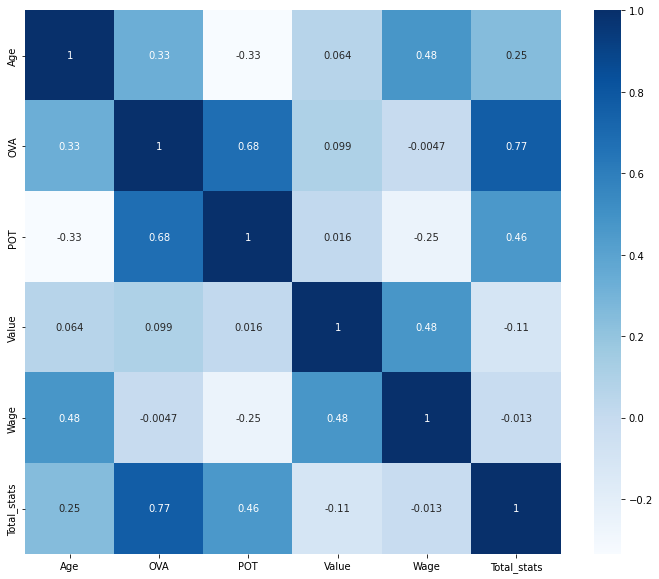

In [229]:
plt.figure(figsize=(12,10))
sns.heatmap(fifa_600.corr(), annot=True,cmap="Blues")

In [230]:
fifa_600.corr()

,Age,OVA,POT,Value,Wage,Total_stats
Age,1.000000,0.330707,-0.334887,0.063587,0.475834,0.245865
OVA,0.330707,1.000000,0.679498,0.098595,-0.004694,0.767975
POT,-0.334887,0.679498,1.000000,0.015881,-0.252088,0.458442
Value,0.063587,0.098595,0.015881,1.000000,0.477184,-0.105061
Wage,0.475834,-0.004694,-0.252088,0.477184,1.000000,-0.013485
Total_stats,0.245865,0.767975,0.458442,-0.105061,-0.013485,1.000000
